In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Part 1

In [5]:
a = pd.read_csv("/content/drive/MyDrive/Data Science Dataset/advertising.csv")
a

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


Q1 (a)

Text(0, 0.5, 'Sales amount')

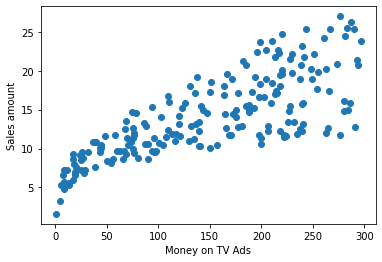

In [49]:
plt.scatter(a["TV"],a["Sales"])
plt.xlabel("Money on TV Ads")
plt.ylabel("Sales amount")

Q1 (b)

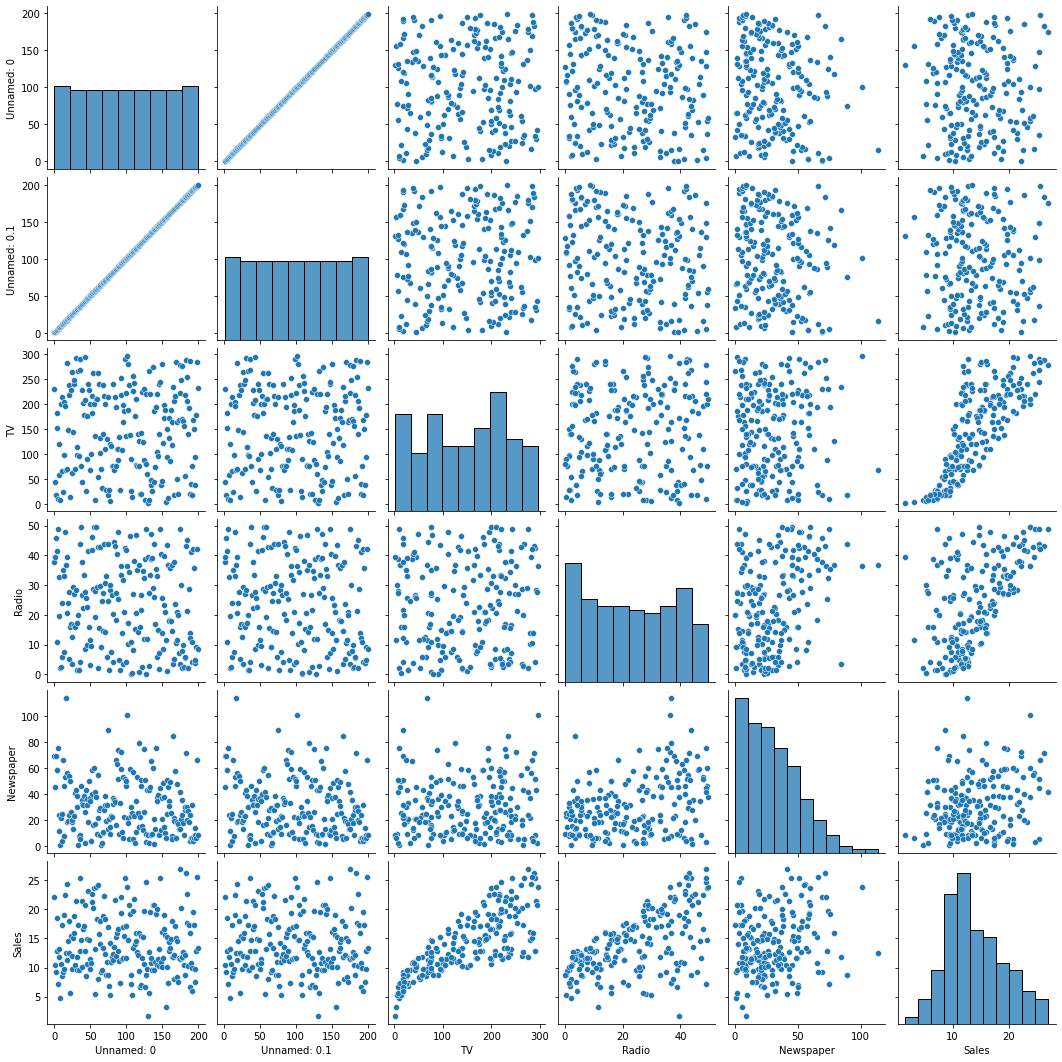

In [48]:
sns.pairplot(a)

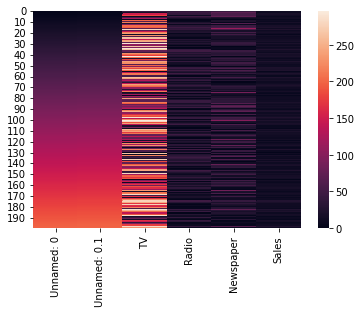

In [47]:
sns.heatmap(a)

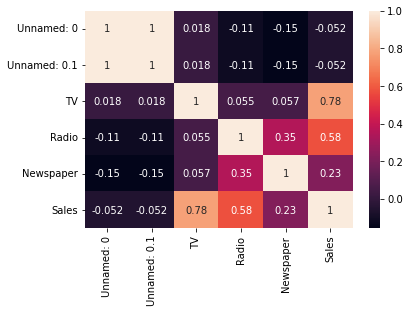

In [46]:
sns.heatmap(a.corr(),annot=True)

Q2

In [22]:
from sklearn.linear_model import LinearRegression

In [31]:
daata = a["TV"]
target = a["Sales"]

In [41]:
a.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
TV              0
Radio           0
Newspaper       0
Sales           0
dtype: int64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(daata,target,test_size=0.25)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150,), (50,), (150,), (50,))

In [52]:
linearR = LinearRegression()
linearR.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

Q3

In [53]:
Linpreds = linearR.predict(np.array(x_test).reshape(-1,1))
Linpreds_df = pd.DataFrame({"Actual":y_test,"Predicted":Linpreds})
Linpreds_df

,Actual,Predicted
81,12.3,18.761254
66,9.5,8.323728
74,17.0,17.438399
146,13.2,18.776286
35,12.8,21.311758
39,21.5,18.169977
45,14.9,15.519257
149,10.1,8.985155
4,12.9,15.804873
54,20.2,19.908730


In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ",mean_absolute_error(y_test,Linpreds))
print("MSE: ",mean_squared_error(y_test,Linpreds))
print("RMSE: ",mean_squared_error(y_test,Linpreds)**0.5)

MAE:  2.6664228340047327
MSE:  11.802294448658385
RMSE:  3.435446761144522


Q4

In [62]:
x = np.arange(0,300,1)
y = (linearR.coef_*x)+linearR.intercept_

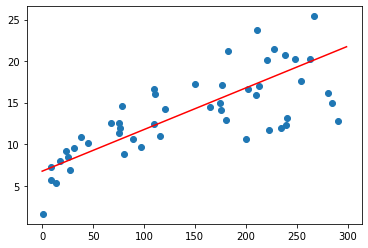

In [63]:
plt.scatter(x_test,y_test)
plt.plot(x,y,color="red")

Q5

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

OLS_Mthd = ols('Sales ~ TV ', data=a).fit()

#fig = sm.graphics.plot_regress_exog(OLS_Mthd)
#sns.residplot(x='Sales',y='TV',data=a) 
#plt.show()


# Part 2

Q1

In [76]:
b = pd.read_csv("/content/drive/MyDrive/Data Science Dataset/pima-indians-diabetes.csv",header=None)
b

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
b.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
b.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [82]:
daata = b.drop(8,axis=1)
target = b[8]

In [85]:
x_train,x_test,y_train,y_test = train_test_split(daata,target,test_size=0.2)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Q2

In [89]:
from sklearn.preprocessing import StandardScaler

In [100]:
ss = StandardScaler()
ss.fit(daata)

StandardScaler()

In [105]:
daata_trans = ss.transform(daata)
print("Mean : ",daata_trans.mean().round(2),"(",daata_trans.mean(),")")
print("SD : ",daata_trans.std())

Mean :  0.0 ( 8.86154575644819e-17 )
SD :  1.0


Q3

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train,y_train)
KNNpreds = knn_model.predict(x_test)
KNNpreds_df = pd.DataFrame({"Actual":y_test,"Predicted":KNNpreds})
KNNpreds_df

,Actual,Predicted
620,0,0
509,0,0
192,1,1
641,0,0
388,1,0
...,...,...
90,0,0
401,0,1
4,1,1
65,0,0


Q4

In [114]:
KNN_TP1 = len(KNNpreds_df[(KNNpreds_df["Predicted"]==KNNpreds_df["Actual"])&(KNNpreds_df["Predicted"]==1)])
KNN_FP1 = len(KNNpreds_df[(KNNpreds_df["Predicted"]!=KNNpreds_df["Actual"])&(KNNpreds_df["Predicted"]==1)])
KNN_FN1 = len(KNNpreds_df[(KNNpreds_df["Predicted"]!=KNNpreds_df["Actual"])&(KNNpreds_df["Predicted"]==0)])
KNN_TN1 = len(KNNpreds_df[(KNNpreds_df["Predicted"]==KNNpreds_df["Actual"])&(KNNpreds_df["Predicted"]==0)])
print(KNN_TP1,KNN_FP1,KNN_FN1,KNN_TN1)
print("Rightly Classified: ",(KNN_TP1+KNN_TN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))
print("Wrongly Classified: ",(KNN_FP1+KNN_FN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))

KNN_Accuracy1 = (KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1)
KNN_Precision1 = (KNN_TP1)/(KNN_TP1+KNN_FP1)
KNN_Recall1 = (KNN_TP1)/(KNN_TP1+KNN_FN1)
KNN_Specificity1 = (KNN_TN1)/(KNN_TN1+KNN_FP1)
KNN_F11 = (2*KNN_Precision1*KNN_Recall1)/(KNN_Precision1+KNN_Recall1)

31 14 24 85
Rightly Classified:  116 / 154
Wrongly Classified:  38 / 154


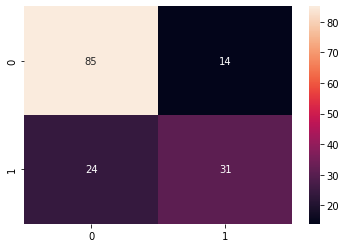

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Decision_Confusion_matrix = confusion_matrix(y_test, KNNpreds)
sns.heatmap(Decision_Confusion_matrix, annot=True, fmt='g')

Q5

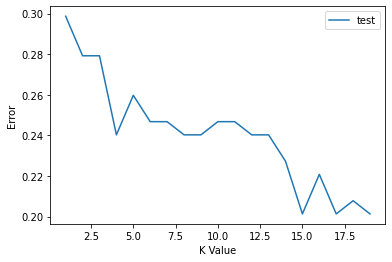

In [117]:
E = []
for k in range(1,20):
  knn_model=KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train,y_train)
  KNNpreds2=knn_model.predict(x_test)
  E.append(np.mean(y_test!=KNNpreds2))
plt.plot(range(1,20),E,label='test')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [121]:
min = max(E)
min_i=0
for i in range(len(E)):
  if(E[i]<min):
    min_i = i
print(min_i)

18


So, for k value 18, we get the least error